#### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pylab as plt

#### Load data: position and tangent angles and magnitudes predictions

In [13]:
ai_vgg19, ai_inception, ai_xception = dict(), dict(), dict()
for i in range(2, 7):
    ai_vgg19[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'angles_inner_vgg19_'+str(i)+'.npy'))
    ai_inception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 
                                        'angles_inner_InceptionResNetV2_'+str(i)+'.npy'))
    ai_xception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'angles_inner_xception_'+str(i)+'.npy'))
at_vgg19, at_inception, at_xception = dict(), dict(), dict()
for i in range(2, 7):
    at_vgg19[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'angles_tang_vgg19_'+str(i)+'.npy'))
    at_inception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 
                                        'angles_tang_InceptionResNetV2_'+str(i)+'.npy'))
    at_xception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'angles_tang_xception_'+str(i)+'.npy'))
m_vgg19, m_inception, m_xception = dict(), dict(), dict()
for i in range(2, 7):
    m_vgg19[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'magnitudes_vgg19_'+str(i)+'.npy'))
    m_inception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 
                                        'magnitudes_inception_'+str(i)+'.npy'))
    m_xception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'magnitudes_xception_'+str(i)+'.npy'))

#### Calculate resultant force magnitude

In [40]:
# Best model ensemble

x = np.cos(ai_vgg19[2] + np.pi + at_xception[2]) * m_inception[2]
y = np.sin(ai_vgg19[2] + np.pi + at_xception[2]) * m_inception[2]

In [41]:
mags = np.sqrt(np.sum(x, axis = 1) ** 2 + np.sum(y, axis = 1) ** 2) /2

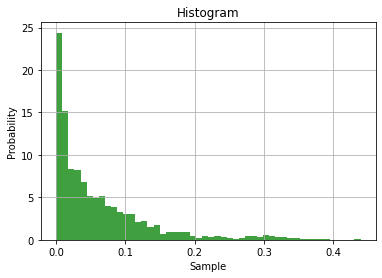

In [42]:
n, bins, patches = plt.hist(mags, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Sample')
plt.ylabel('Probability')
plt.title('Histogram')
plt.grid(True)
plt.show()

In [33]:
ai = np.load('/home/renat_sergazinov/python-git-workspace/PhotoForceReconML/labels/test/2/angles_inner.npy')
at = np.load('/home/renat_sergazinov/python-git-workspace/PhotoForceReconML/labels/test/2/angles_tang.npy')
m = np.load('/home/renat_sergazinov/python-git-workspace/PhotoForceReconML/labels/test/2/mags.npy')

In [44]:
x = np.cos(ai + np.pi + at) * m / 2
y = np.sin(ai + np.pi + at) * m / 2

In [45]:
mags = np.sqrt(np.sum(x, axis = 1) ** 2 + np.sum(y, axis = 1) ** 2)

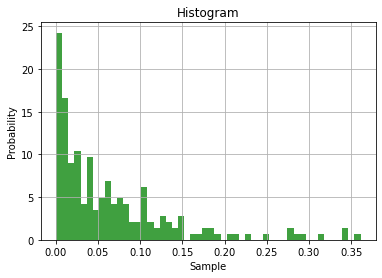

In [46]:
n, bins, patches = plt.hist(mags, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Sample')
plt.ylabel('Probability')
plt.title('Histogram')
plt.grid(True)
plt.show()